<a href="https://colab.research.google.com/github/Swamy612/PCA-Principal-Component-Analysis-/blob/main/PRINCIPLE_COMPONENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.datasets import load_wine, load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

# warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load wine data
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# creating x and y variable
x = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
y = wine_data.target

In [ ]:
# data sample
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# data dimension
x.shape

(178, 13)

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
# data standardization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# data sample after scaling
x_train_scaled = pd.DataFrame(x_train_scaled, columns=scaler.get_feature_names_out())
x_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.067633,-0.867326,-0.326216,-1.004397,-0.142415,1.075193,1.116253,-1.144269,0.422537,0.900385,0.226581,1.331065,0.955020
1,-1.137951,-0.831691,0.515631,0.898632,-1.123983,0.412929,0.263176,0.507253,-0.980866,-0.943112,-0.120587,0.827423,-1.142615
2,1.476533,-0.653515,0.442427,-0.858010,0.558705,1.579774,1.889973,-0.357830,0.439863,1.531953,1.181292,0.309792,2.973198
3,0.138314,-1.170225,-2.412533,-1.297170,-1.544654,1.075193,1.146011,-0.829693,1.167553,0.081053,0.703937,0.813433,-0.770761
4,-0.828178,-1.090046,-0.289614,-1.004397,0.067921,-0.391248,-0.927162,2.080132,-2.072401,-0.785219,1.268084,-1.299062,-0.205036


In [ ]:
# Reducing the dimensions to 2 (2 principal components)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_scaled)


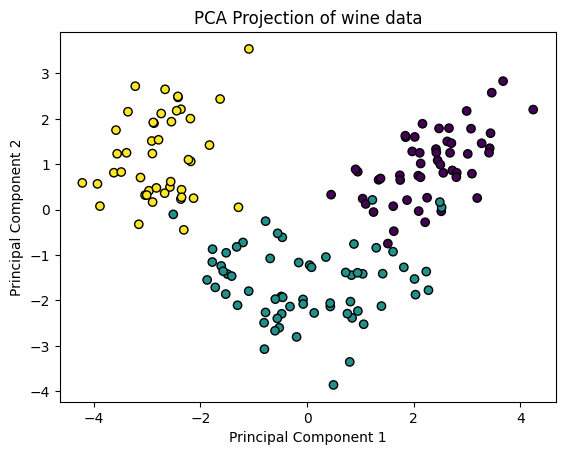

In [ ]:
# ploting the PCA reduced data
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title("PCA Projection of wine data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# explained variance from the pc's
print('Explained Variance:', pca.explained_variance_ratio_)
print('Cumulative % of variance for 2 PC\'s:', round(pca.explained_variance_ratio_.sum()*100, 2), '%')

Explained Variance: [0.36494188 0.18695436]
Cumulative % of variance for 2 PC's: 55.19 %


In [ ]:
# PCA with actual data

# data import
data = load_breast_cancer()

# converting the data to dataframe
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [ ]:
# data sample
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# data dimensions
x.shape

(569, 30)

In [ ]:
# standardisation
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# PCA
pcs = PCA(n_components=30)
x_pcs = pcs.fit_transform(x_scaled)
print(x_pcs.shape)

(569, 30)


In [ ]:
# Explained variance
print('Explained Variance:', pcs.explained_variance_ratio_)
print('Cumulative % of variance for 30 PC\'s:', round(pcs.explained_variance_ratio_.sum()*100, 2), '%')

Explained Variance: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
Cumulative % of variance for 30 PC's: 100.0 %


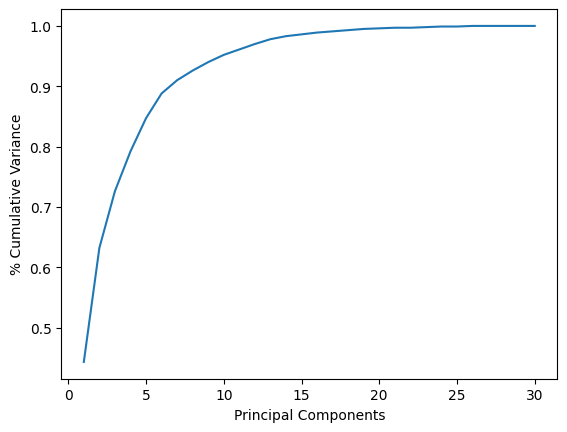

In [ ]:
# cum variance
cum_var=[]
total=0
for variance in pcs.explained_variance_ratio_:
  total+=variance
  cum_var.append(round(float(total), 3))
  # plotting
plt.plot(range(1, 31), cum_var)
plt.xlabel('Principal Components')
plt.ylabel('% Cumulative Variance')
plt.show()

In [ ]:
# create dataframe with columns PC's, % variance, % cummulative variance

summary_table = pd.DataFrame()
summary_table['PC\'s'] = list(range(1, 31))
summary_table['% variance'] = np.round((pcs.explained_variance_ratio_)*100, 2)
summary_table['Cummulative variance'] = round(summary_table['% variance'].cumsum(), 2)
summary_table

,PC's,% variance,Cummulative variance
0,1,44.27,44.27
1,2,18.97,63.24
2,3,9.39,72.63
3,4,6.60,79.23
4,5,5.50,84.73
5,6,4.02,88.75
6,7,2.25,91.00
7,8,1.59,92.59
8,9,1.39,93.98
9,10,1.17,95.15


In [ ]:
# PCA
final_pcs = PCA(n_components=10)
x_pcs_final = final_pcs.fit_transform(x_scaled)

# Explained variance
print('Explained Variance:', final_pcs.explained_variance_ratio_)
print('Cumulative % of variance for 10 PC\'s:', round(final_pcs.explained_variance_ratio_.sum()*100, 2), '%')

Explained Variance: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Cumulative % of variance for 10 PC's: 95.16 %


In [ ]:
# create dataframe with columns PC's, % variance, % cummulative variance

summary_table = pd.DataFrame()
summary_table['PC\'s'] = list(range(1, 11))
summary_table['% variance'] = np.round((final_pcs.explained_variance_ratio_)*100, 2)
summary_table['Cummulative variance'] = round(summary_table['% variance'].cumsum(), 2)
summary_table

,PC's,% variance,Cummulative variance
0,1,44.27,44.27
1,2,18.97,63.24
2,3,9.39,72.63
3,4,6.60,79.23
4,5,5.50,84.73
5,6,4.02,88.75
6,7,2.25,91.00
7,8,1.59,92.59
8,9,1.39,93.98
9,10,1.17,95.15


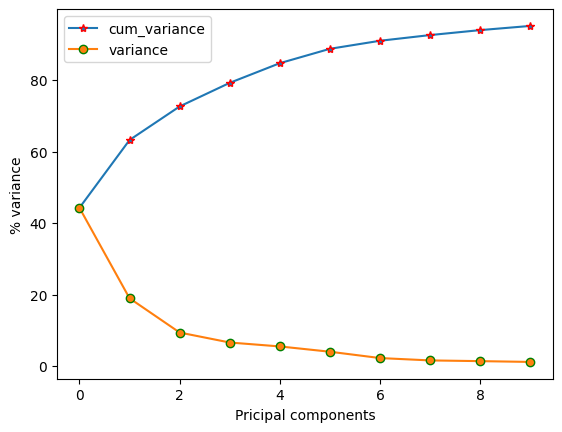

In [ ]:
plt.plot(summary_table['Cummulative variance'], marker='*', markeredgecolor='r', label='cum_variance')
plt.plot(summary_table['% variance'], marker='o', markeredgecolor='g', label='variance')
plt.xlabel('Pricipal components')
plt.ylabel('% variance')
plt.legend()
plt.show()

# model building after PCA

In [ ]:
# PCA with actual data

# data import
data = load_breast_cancer()

# converting the data to dataframe
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# scaling
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [ ]:
# PCA
ml_pcs = PCA(n_components=10)
x_train_pcs_ml = ml_pcs.fit_transform(x_train_scale)

# Explained variance
print('Explained Variance:', ml_pcs.explained_variance_ratio_)
print('Cumulative % of variance for 9 PC\'s:', round(ml_pcs.explained_variance_ratio_.sum()*100, 2), '%')

Explained Variance: [0.43502782 0.19500007 0.09781519 0.06486409 0.05253378 0.041128
 0.0223559  0.01647952 0.01380052 0.01205262]
Cumulative % of variance for 9 PC's: 95.11 %


In [ ]:
# Decision tree model - training
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train_pcs_ml, y_train)
print('Training Score:', round(tree_clf.score(x_train_pcs_ml, y_train)*100,2), '%')

Training Score: 100.0 %


Testing Accuracy: 94.74
Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



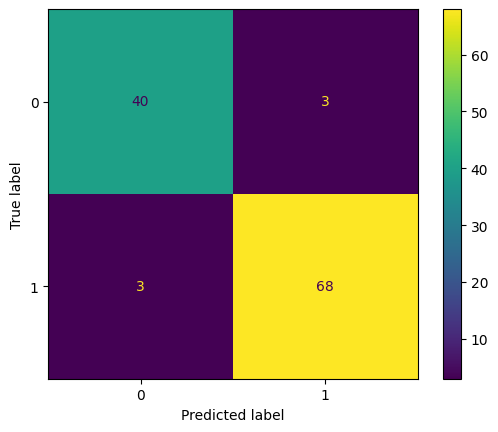

In [ ]:
# model prediction
x_test_pcs_ml = ml_pcs.transform(x_test_scale)
y_pred_pcs = tree_clf.predict(x_test_pcs_ml)
print('Testing Accuracy:', round(accuracy_score(y_test, y_pred_pcs)*100, 2))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pcs)
print('Classification Report:\n\n', classification_report(y_test, y_pred_pcs))